<a href="https://colab.research.google.com/github/supathdhitalGEO/raster-data-processing-using-GDAL/blob/main/LayerStacking%26Mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
from osgeo import gdal
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import os

In [95]:
band2=gdal.Open("/content/kharibot_b2.tif")
band3=gdal.Open("/content/kharibot_b3.tif")
band4=gdal.Open("/content/kharibot_b4.tif")
print(band2)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f70e35015d0> >


In [96]:
print('bands=',band2.RasterCount)

bands= 1


In [97]:
b2=band2.ReadAsArray()
b3=band3.ReadAsArray()
b4=band4.ReadAsArray()

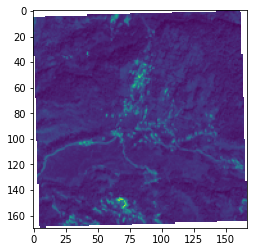

In [98]:
plt.imshow(b2)

**Stacking the three band to form new band**

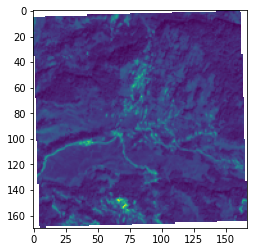

In [99]:
stack=(b2+b3+b4)
plt.imshow(stack)

**Stacking Multiple bands**

In [100]:
outvrt = '/vsimem/stacked.vrt' 
outtif = '/content/stacked.tif'
tifs = [band2,band3,band4] 
outds = gdal.BuildVRT(outvrt, tifs, separate=True)
outds = gdal.Translate(outtif, outds)

**Raster band count**

In [101]:
print('Raster band count before stacking=',band2.RasterCount)
print('After stacking three Bands total band count is=',outds.RasterCount)

Raster band count before stacking= 1
After stacking three Bands total band count is= 3


**Mosaicing two Raster data**

In [102]:
import subprocess
import glob

**Loading the two tif files for mosaicing**

In [103]:
tif1=gdal.Open('/content/kharibot.tif')
tif2=gdal.Open('/content/kharibot_1.tif')

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


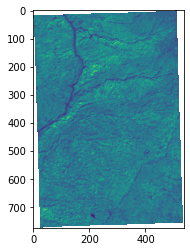

In [123]:
get=tif1.GetRasterBand(8)
read=get.ReadAsArray()
print(read)
plt.imshow(read)

In [104]:
tifs = [tif1,tif2] 
print(tifs)

[<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f70e36fe390> >, <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f70e36fec00> >]


In [105]:
g = gdal.Warp("Merged.tif", tifs, format="GTiff",
              options=["COMPRESS=LZW", "TILED=YES"]) # if you want
print(g)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f70e3501b40> >


**reading and plotting the merged data**

In [109]:
m=gdal.Open("/content/Merged.tif")

In [115]:
r=m.GetRasterBand(4)

In [117]:
read=r.ReadAsArray()

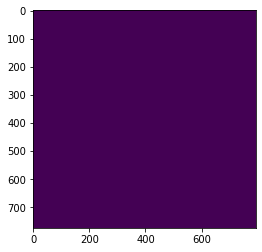

In [118]:
plt.imshow(read)

**Calculating NDVI**

In [124]:
data=gdal.Open("/content/sample.tif")
red = data.GetRasterBand(4).ReadAsArray()
nir = data.GetRasterBand(8).ReadAsArray()
ndvi = (nir - red) / (nir + red)
print(ndvi)

[[       nan        nan        nan ... 0.6266415         nan        nan]
 [       nan        nan        nan ... 0.61855793        nan        nan]
 [0.33208767 0.42088768 0.49411884 ... 0.6032551         nan        nan]
 ...
 [       nan        nan 0.16246927 ... 0.30563313 0.35149556 0.387192  ]
 [       nan        nan 0.2664704  ...        nan        nan        nan]
 [       nan        nan 0.343574   ...        nan        nan        nan]]
